# Project: Experimental Design and A/B Testing

**Bogor, 3rd July 2023**

---

# 1. Introduction and Background

**Marketing Campaign**

Marketing companies want to run successful campaigns. The company's current marketing strategy only relies on Public Service Announcements (PSA). The company has a new strategy which is ads. However, the company is still unsure whether the ad will succeed in increasing user conversions or not. Therefor, we will to do A/B testing to compare PSA and ads.

# 2. Setting Up Probem
---

## 2.1. Experiment Goal

Experiment Goal : membandingkan pengaruh Public Service Announcements (PSA) dan ads terhadap conversions rate. Sehingga menjadi pertimbangan marketing companies untuk menyukseskan campaigns.

## 2.2. Choosing Metrics

**Driver Metrics** :

    Conversion Rate

Notes:
Metric ini memperlihakan persentase user yang converted pada masing-masing kelompok. Sehingga untuk memperoleh Conversion Rate dihitungan dengan membagi total user yang converted dengan total user pada masing-masing kategori. 

**Guardrail Metrics** : 

    Simple Ratio Mismatch

Notes:
Guardial metrics digunakan sebagai alert terhadap potensi misleading atau hasil experiment yang salah.

## 2.3. Define Variants

**Control** : Public Service Announcements
    
**Tretament** : Creative Ads dengan tombol CTA yang bertuliskan "Get Started Now" untuk menarik perharian kostumer

## 2.4. Define Hypotesis

Didefinisikan:

- $CR_{\text{old}}$ : Conversion Rate pada **control** (PSA)
- $CR_{\text{new}}$ : Conversion Rate pada **treatment** (ads)

Maka definisi dari Null hypothesis ($H_0$) dan Alternative hypothesis ($H_1$)

$$H_0 : CR_{\text{new}} ≤ CR_{\text{old}}$$
$$H_1 : CR_{\text{new}} > CR_{\text{old}}$$

# 3. Designing Experiments
---

## 3.1. Randomization Unit

Orang yang berkunjung ke website

## 3.2. Target of Randomization Unit

Orang yang berkunjung ke website dan **converted**

## 3.3. Sample Size

Diasumsikan:
- significant level = 5%
- power = 80%
- standard deviation of population = 5
- difference between control and treatment = 1% (agar lebih profitable, diharapkan conversion rate naik 1%)

**Formula** untuk menghitung sample size:

$$
n = \cfrac{2 σ^2 (z_{1-α/2}+z_{1-β})^2}{δ^2}
$$


  - $n$ is sample size in each group 
  - $σ$ is standard deviation of the outcome variable
  - $δ$ is difference between two variance
  - $z_{1-α/2}$ represents the desired level of statistical significance
  - $z_{1-β}$ represents the desired power

Berdasarkan significant level sebesar 5% dan power sebesar 80%, sample size dapat dihitung dengan menggunakan **formula** sebagai berikut: 

$$
n = \cfrac{16 σ^2 }{δ^2}
$$

  - $n$ is sample size in each group 
  - $σ$ is standard deviation of the outcome variable
  - $δ$ is difference between two variance

In [1]:
σ = 5
δ = 0.01

n = (16*(σ^2))/(δ)
n

11200.0

Sample size pada satu group yaitu 11.200
karena terdapat **dua group** yaitu control dan treatment, maka total sample size yaitu 22.400

## 3.4. How Long Run Experiment

Berdasarkan traffic data, experiment akan dijalankan selama 14 hari dengan menghindari efek day-of-week.

Note:
diasumsikan rata-rata user per hari 2.240

# 4. Running Experiment and Obtaining Data
---

Berdasarkan hasil experiment selama 14 hari diperoleh data sebagai berikut:

In [2]:
import pandas as pd
import numpy as np

# read csv
df = pd.read_csv('marketing/marketing_AB.csv')
df.tail()

c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.jpijnswnnan3ce6lli5fwsphut2vxmth.gfortran-win_amd64.dll
c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [3]:
# random sampling pada masing-masing variant
df = pd.concat([
    df[df['test group'] == 'psa'].sample(n=int(n), random_state=1),
    df[df['test group'] == 'ad'].sample(n=int(n), random_state=1) 
]).sort_values('Unnamed: 0').reset_index(drop=True)
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,9,1446284,ad,False,142,Monday,14
1,13,1037215,ad,False,40,Friday,13
2,18,900681,psa,False,248,Saturday,19
3,68,904595,psa,False,13,Tuesday,19
4,99,1550138,ad,False,9,Tuesday,19
...,...,...,...,...,...,...,...
22395,587961,1455175,ad,False,15,Tuesday,22
22396,588020,912634,psa,False,2,Tuesday,22
22397,588050,922728,psa,False,1,Tuesday,22
22398,588052,900959,psa,False,16,Tuesday,22


# 5. Analyzing and Interpreting the Data
---

## Ensure the Trustworthiness

### Check the Data Quality

In [4]:
# cek missing value
df.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [5]:
# cek duplicate data
df.duplicated(['user id']).sum()

0

In [6]:
# data shape
df.shape

(22400, 7)

### Data Exploration

Karena kita ingin mengetahui conversion rate, isi tabel berikut!

<center>

|Group|#User|#Converted|Conversion Rate
|:--|:--:|:--:|:--:|
|Control|-|-|-|
|Treatment|-|-|-|

</center>

In [7]:
# buat data control (psa)
df_control = df[df["test group"] == "psa"]

df_control.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
2,18,900681,psa,False,248,Saturday,19
3,68,904595,psa,False,13,Tuesday,19
6,140,901904,psa,False,32,Wednesday,19
7,157,902234,psa,False,105,Tuesday,19
8,167,906079,psa,False,37,Monday,10


In [8]:
# buat data treatment (ad)
df_treatment = df[df["test group"] == "ad"]

df_treatment.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,9,1446284,ad,False,142,Monday,14
1,13,1037215,ad,False,40,Friday,13
4,99,1550138,ad,False,9,Tuesday,19
5,127,1482863,ad,False,27,Tuesday,20
16,385,1017353,ad,False,41,Tuesday,19


In [9]:
# banyak user pada masing-masing variant
n_control = df_control.shape[0]
n_treatment = df_treatment.shape[0]

print("banyak user control\t: ", n_control)
print("banyak user treatment\t: ", n_treatment)

banyak user control	:  11200
banyak user treatment	:  11200


In [10]:
# banyak user yang converted pada masing-masing variant
n_convC = len(df_control[df_control['converted'] == True])
n_convT = len(df_treatment[df_treatment['converted'] == True])

print("banyak user converted pada control\t: ", n_convC)
print("banyak user converted pada treatment\t: ", n_convT)

banyak user converted pada control	:  188
banyak user converted pada treatment	:  295


In [11]:
# Conversion Rate pada masing-masing variant

cr_C = n_convC/n_control
cr_T = n_convT/n_treatment

print(f"Conversion Rate control \t: {cr_C:.5f}")
print(f"Conversion Rate treatment\t: {cr_T:.5f}")

Conversion Rate control 	: 0.01679
Conversion Rate treatment	: 0.02634


Diperoleh tabel sebagai berikut :

<center>

|Group|#User|#Converted|Conversion Rate
|:--|:--:|:--:|:--:|
|Control|11200|188|0.01679|
|Treatment|11200|295|0.02634|

</center>

<ipython-input-12-4aac45d13f96>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


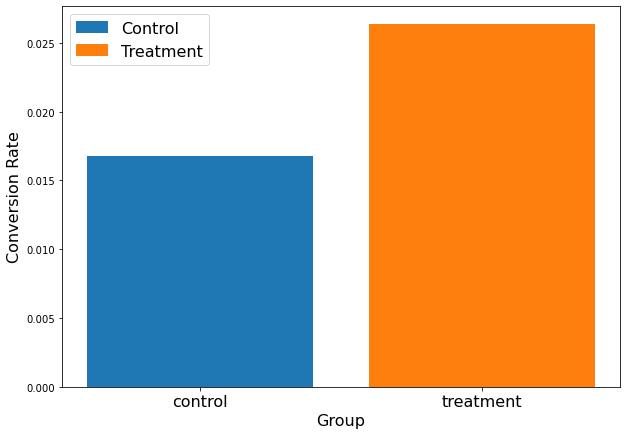

In [12]:
# visualisasi perbandingan Conversion Rate masing-masing variant

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("control", cr_C, label="Control")
ax.bar("treatment", cr_T, label="Treatment")

# Styling plot
ax.set_ylabel("Conversion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

### Chi-Square Test for Detect SRM

Langkah-langkah melakukan Chi-Square untuk mendeteksi SRM:

**1. Definisi null dan alternative hypothesis ($H_0$ and $H_1$)**

- $H_0$  : No SRM detected
- $H_1$  : SRM detected

**2. Menghitung chi-square statistics**

$$ \chi^2 = \sum \frac{\left ( \text{observed - expected} \right )^2}{\text{expected}} $$

Dimana :
- Observed: the control and variation traffic volumes (sample size), respectively
- Expected: the expected values for control and treatment — i.e. the total observed divided by 2


In [13]:
# menghitung observed dan expected
observed = [ n_control, n_treatment ]
total_traffic= sum(observed)
expected = [ total_traffic/2, total_traffic/2 ]

observed, expected

([11200, 11200], [11200.0, 11200.0])

In [14]:
# menghitung chi-square statistics

from scipy.stats import chisquare

chi = chisquare(observed, f_exp=expected)
print(chi)

Power_divergenceResult(statistic=0.0, pvalue=1.0)


**3. Definisi decision rules**

Dalam menyimpulkan test, dapat menggunakan rules sebagai berikut:
- Membandingkan chi-square statistics dengan critical value
     -  $\chi^2 > \chi^2_{\alpha,df}$ → reject $H_0$

- Membandingkan p-value dengan alpha
   - pvalue < $\alpha$ → reject $H_0$

Dengan degree of freedom (df): 
$$ df = (rows − 1) × (columns − 1) $$ 


In [15]:
# critical value adalah chi-square value pada alpha

import scipy

alpha = 0.01
df = (2-1)*(2-1)  

chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

Critical value: 6.635


In [16]:
# membandingkan chi-square statistics dengan critical value
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [17]:
# membandingkan P-Value dengan alpha.
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM')

Fail to reject H0 : No SRM


Berdasarkan hasil uji Chi-Square dengan significance level 1%, pada data control dan treatment **tidak terdeteksi SRM**.

## Hypotesis Testing

### Mendefinisikan Null Hypothesis ($H_0$) dan Alternative Hypothesis ($H_1$)

Kita ingin membuktikan: **conversion rate** pada user dengan treatment **ad** adalah **lebih besat** dari **conversion rate** pada user dengan treatment **psa**


- Didefinisikan:

    - $CR_{\text{old}}$ : Conversion Rate pada **control** (PSA)
    - $CR_{\text{new}}$ : Conversion Rate pada **treatment** (ads)


- Maka definisi dari Null hypothesis ($H_0$) dan Alternative hypothesis ($H_1$)

$$H_0 : CR_{\text{new}} ≤ CR_{\text{old}}$$
$$H_1 : CR_{\text{new}} > CR_{\text{old}}$$

- Set siginificance level (alpha)
 - Significance level = 0.05 

### Menentukan Statistical Test

In [18]:
# import library
from statsmodels.stats.proportion import proportions_ztest

# buat count converted & total observation
count_convert = [n_convT, n_convC]
count_observation = [n_treatment, n_control]

# buat alternative
alternative_option = "larger"

# hitung z statistik dan p-value
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 4.9220
P-value : 0.0000


### Membuat Aturan Keputusan

In [19]:
from scipy import stats

# critical value
alpha= 0.05
z_crit = stats.norm.ppf(1-alpha)

print(f"z critical value : {z_crit:.4f}")

z critical value : 1.6449


In [20]:
# melakukan pengambilan keputusan dari z-stats dan z-crit
if z_stat > z_crit:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [21]:
# perbandingan P-Value dengan alpha.
if p_value < 0.05:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


### Visualisasi

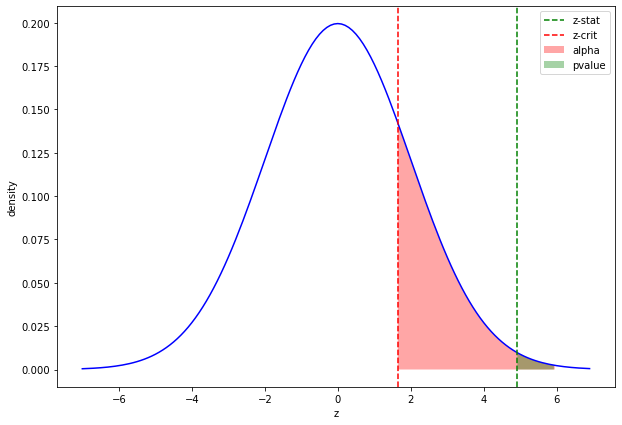

z statistics : 4.9220
z critical : 1.6449


In [22]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot sample distribution 
x = np.arange(-7, 7, 0.1)
plt.plot(x, stats.norm.pdf(x, 0, 2), 
         color='blue')

# plot alpha region
x_alpha = np.arange(z_crit,6, 0.1)
y_alpha = stats.norm.pdf(x_alpha, 0, 2)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(z_stat,6, 0.1)
y_pvalue = stats.norm.pdf(x_pvalue, 0, 2)
plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(z_stat, 6), 
            color ="green", 
            linestyle = "--", 
            label ="z-stat")

plt.axvline(z_crit, 
            color ="red", 
            linestyle = "--", 
            label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.show()

print(f"z statistics : {z_stat:.4f}")
print(f"z critical : {z_crit:.4f}")

Dengan level signifikansi 5%, terdapat cukup bukti bahwa conversion rate di **treatment** (ads) **lebih besar** dibandingkan conversion rate di **control** (PSA)

## Confidence Interval

In [23]:
from statsmodels.stats.proportion import confint_proportions_2indep

# menghitung confidene interval untuk proporsi
confidence_interval = confint_proportions_2indep(count1 = n_convT, 
                                                 nobs1 = n_treatment,
                                                 count2 = n_convC, 
                                                 nobs2 = n_control, 
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(0.005760817630394233, 0.013392045872390842)


Berdasarkan hasil tersebut, kita yakin 95% bahwa selisih atau difference proporsi user yang convert (Conversion Rate) pada grup treatment (ad) dan kontrol (psa) terletak antara 0.00576 dan 0.01339.

Atau dapat dikatakan bahwa peningkatan **Conversion Rate** dengan campaign **ad** (treatment) **meningkat** sebesar **0.00576 dan 0.01339**.

# Conclusion and Recommendation
---

**Conclusion**:

Dengan tingkat keyakinan 95%, terdapat cukup bukti bahwa **Conversion Rate** dengan campaign **ad** (treatment) **lebih tinggi** dibandingkan dengan campaign **psa** (control).

**Rekomendasi untuk Marketing**: 

Berdasarkan hasil statistical test hasilnya adalah statistically significant. Namun untuk membuat keputusan apakah akan akan menggunakan ad tidak, **harus dipastikan apakah secara practically sigificant** seperti biaya ad, biaya maintanance dll tidak rugi dengan **uplift sebesar 0.00576 dan 0.01339**.
